In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [9]:
dfs = []
for year in range(2000, 2011):
    dfs.append(pd.read_csv(f'{year}.csv'))
df = pd.concat(dfs)
df = df.sort_values(by='popularity', ascending=False)
top50 = df.iloc[:50]
len(df)
df = df.drop('id', axis = 1)

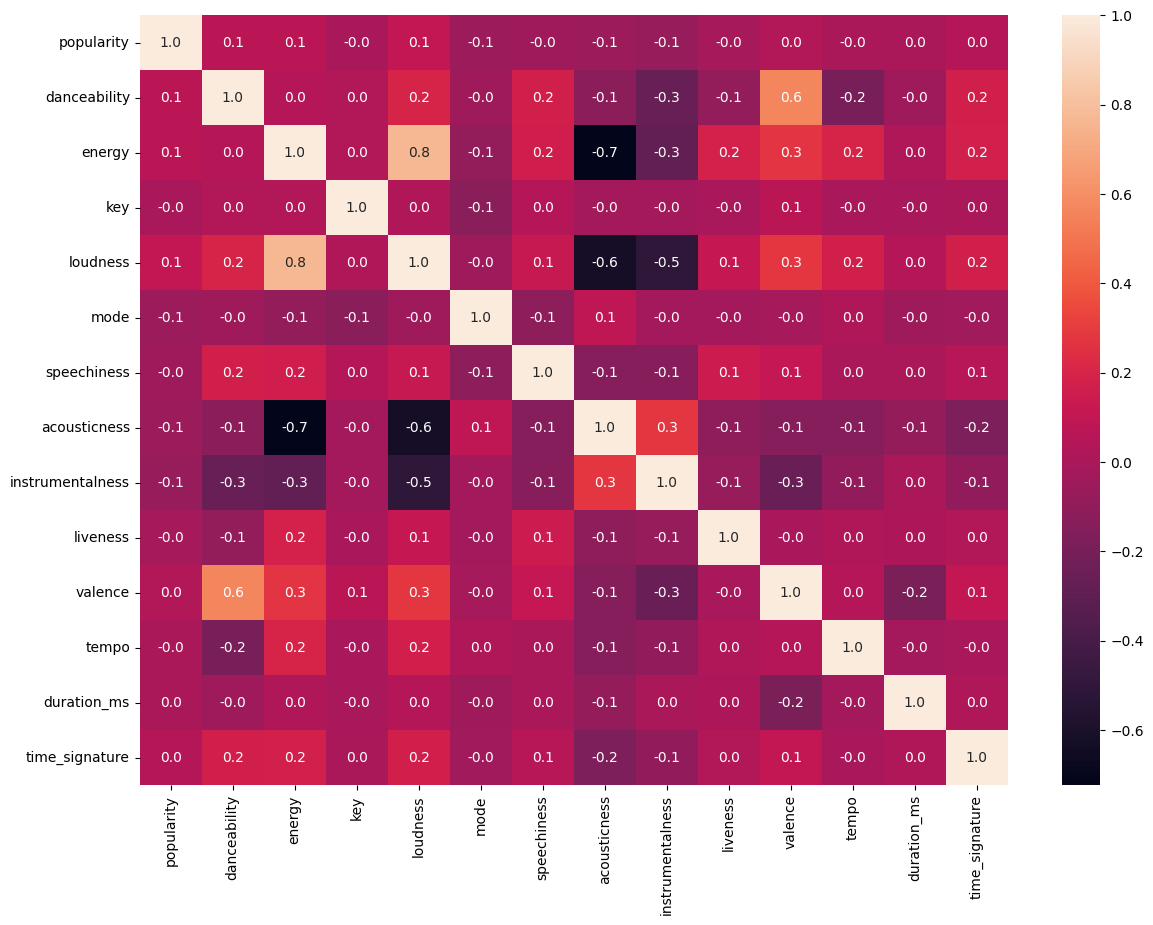

In [10]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

In [12]:
top100 = df.iloc[:100]


,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,90,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.234,0.285,173.372,266773,4
0,88,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.237,0.662,112.238,290320,4
3,88,0.637,0.678,0,-3.798,1,0.2660,0.20900,0.000000,0.156,0.254,84.039,250760,4
0,88,0.684,0.607,11,-8.127,0,0.1000,0.02670,0.000307,0.191,0.498,81.001,195373,4
0,87,0.790,0.647,10,-5.983,0,0.1360,0.05150,0.000000,0.248,0.654,87.999,211000,4


In [14]:
import scipy.stats as stats


# Confidence level
confidence_level = 0.97

# Calculate the confidence intervals for each column
confidence_intervals = {}

for column in top100.columns:
    sample_data = top100[column]
    sample_mean = sample_data.mean()
    sample_size = len(sample_data)
    standard_error = stats.sem(sample_data)
    degrees_of_freedom = sample_size - 1
    t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
    margin_of_error = t_critical * (standard_error / (sample_size ** 0.5))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    confidence_intervals[column] = (lower_bound, upper_bound)

# Print confidence intervals for each variable
for column, interval in confidence_intervals.items():
    print(f"Variable: {column}, 95% Confidence Interval: ({interval[0]:.2f}, {interval[1]:.2f})")

Variable: popularity, 95% Confidence Interval: (83.00, 83.10)
Variable: danceability, 95% Confidence Interval: (0.64, 0.65)
Variable: energy, 95% Confidence Interval: (0.74, 0.75)
Variable: key, 95% Confidence Interval: (5.34, 5.50)
Variable: loudness, 95% Confidence Interval: (-5.60, -5.50)
Variable: mode, 95% Confidence Interval: (0.48, 0.50)
Variable: speechiness, 95% Confidence Interval: (0.10, 0.10)
Variable: acousticness, 95% Confidence Interval: (0.13, 0.14)
Variable: instrumentalness, 95% Confidence Interval: (0.02, 0.02)
Variable: liveness, 95% Confidence Interval: (0.18, 0.18)
Variable: valence, 95% Confidence Interval: (0.54, 0.55)
Variable: tempo, 95% Confidence Interval: (117.60, 118.78)
Variable: duration_ms, 95% Confidence Interval: (231173.33, 233097.77)
Variable: time_signature, 95% Confidence Interval: (3.97, 3.97)


In [15]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,11000.000000
mean,57.530727,0.592673,0.677118,5.311364,-6.907451,0.673545,0.088064,0.235969,0.069404,0.190595,0.554605,121.924169,2.299078e+05,3.923455
std,8.254452,0.171680,0.220870,3.558923,4.175820,0.468937,0.092681,0.282709,0.212889,0.155500,0.251889,31.064930,8.297985e+04,0.372179
min,41.000000,0.000000,0.000075,0.000000,-45.006000,0.000000,0.000000,0.000001,0.000000,0.012300,0.000000,0.000000,3.094600e+04,0.000000
25%,51.000000,0.479000,0.544000,2.000000,-8.021750,0.000000,0.034500,0.011900,0.000000,0.092575,0.357000,96.159250,1.940768e+05,4.000000
50%,56.000000,0.601000,0.713000,5.000000,-5.905000,1.000000,0.048200,0.108000,0.000004,0.128000,0.566000,119.896500,2.255265e+05,4.000000
75%,63.000000,0.719000,0.855000,8.000000,-4.478750,1.000000,0.096425,0.382000,0.000995,0.252000,0.765000,143.043000,2.588930e+05,4.000000
max,90.000000,0.986000,0.999000,11.000000,0.522000,1.000000,0.950000,0.996000,1.000000,0.993000,1.000000,216.020000,4.270034e+06,5.000000


Based on the confidence interval and the output from the description of the data the optimal values for nostalgia in a song based on 2000-2010 are:
Danceability of 0.64 or 0.65
Energy of .74 or .75
Key between 5.3 and 5.5
Loudness of -5.6 and -5.5
Mode between 0.48 and 0.5
Speechiness of 0.1
Acousticness of 0.13 or 0.14
Instrumentalness of 0.02
Liveness of 0.18
Valence of 0.54 or 0.55
Tempo of 118 or 119
Duration between 231173 and 233098
Time signature of 4
